<a href="https://colab.research.google.com/github/hindia-vic/deep_learning/blob/main/computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

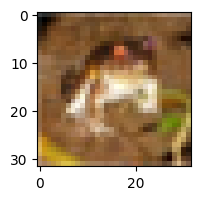

In [ ]:
plt.figure(figsize=(10,2))
plt.imshow(X_train[0])

In [ ]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(index,X,y):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

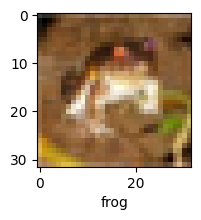

In [ ]:
plot_sample(0,X_train,y_train)

In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 91ms/step - accuracy: 0.3038 - loss: 1.9329
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 200s 90ms/step - accuracy: 0.4164 - loss: 1.6479
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 94ms/step - accuracy: 0.4532 - loss: 1.5521
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 90ms/step - accuracy: 0.4801 - loss: 1.4805
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.4974 - loss: 1.4321


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print('classification report: \n',classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.71      0.33      0.45      1000
           1       0.70      0.44      0.54      1000
           2       0.39      0.26      0.31      1000
           3       0.32      0.42      0.36      1000
           4       0.29      0.58      0.39      1000
           5       0.42      0.25      0.32      1000
           6       0.45      0.66      0.53      1000
           7       0.57      0.47      0.51      1000
           8       0.47      0.71      0.57      1000
           9       0.73      0.34      0.47      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.45     10000
weighted avg       0.50      0.45      0.45     10000



convolutional neural network



In [ ]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.3589 - loss: 1.7655
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.5853 - loss: 1.1842
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.6398 - loss: 1.0363
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.6672 - loss: 0.9639
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.6934 - loss: 0.8851
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7139 - loss: 0.8296
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7264 - loss: 0.7872
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.7411 - loss: 0.7464
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.7516 - loss: 0.7106
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.7636 - loss: 0.6766


In [ ]:
y_pred=cnn.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print('classification report: \n',classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.82      0.79      0.81      1000
           2       0.63      0.54      0.58      1000
           3       0.52      0.49      0.50      1000
           4       0.63      0.67      0.65      1000
           5       0.64      0.52      0.57      1000
           6       0.79      0.77      0.78      1000
           7       0.70      0.75      0.72      1000
           8       0.78      0.81      0.79      1000
           9       0.69      0.82      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

